In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Gensim
from gensim.corpora.dictionary import Dictionary

In [2]:
# Categories
'''
bank_financial_business_review
construction_review
distribution_trade_transport_reviews
education_review
manufacture_chemistry_review
media_design_reviews
organization_association_reviews
medical_medicine_welfare_reviews
service_reviews
'''

'\nbank_financial_business_review\nconstruction_review\ndistribution_trade_transport_reviews\neducation_review\nmanufacture_chemistry_review\nmedia_design_reviews\norganization_association_reviews\nmedical_medicine_welfare_reviews\nservice_reviews\nservice_reviews\n'

In [98]:
# Read Data

df = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/service_reviews.csv')
# 결측치 제거
df = df.dropna()
adv = df['adv'] # Advantage review
dadv = df['dadv'] # Disadvantage review
df.head()

,Unnamed: 0,cmp,adv,dadv
0,0,(주)에스씨케이컴퍼니,"휴게시간, 주휴수당 등 법적인 것을 모두 보장받을 수 있다 유동적인 적은 시간 근무...",일하는 시간 동안은 눈코뜰새 없이 일해야함. 핸드폰도 못보고 바쁠때는 화장실도 못감...
1,1,한국맥도날드(유),스케줄을 일주일 단위로 신청 할 수 있어서 일정 조정이 편하다. 지문으로 출퇴근 시...,피크 타임의 인원을 충원해야 하기 때문에 원하지 않는 시간대에 추가 근무 요청이 들...
2,2,롯데리아 (매장),식사를 챙겨준다.신입직원 교육이 길고 배려 잘 해준다. 아르바이트를 체계적으로 배울...,식사가 햄버거뿐이다.최저시급 챙겨준다.휴게시간에 쉴 공간이 없다. 바쁜 시간에는 매...
3,3,(주)트랜스코스모스코리아,도서가 많아서 책읽기 좋고 휴게공간 식사공간이 있어서 중식시간이 편하기 휴식할 수 ...,업무특성상 휴식시간이 제공되지 않아서 화장실만 겨우 다녀온다 휴게시간이 보장되었음 ...
4,4,(주)유베이스,6시 되면 칼퇴근 가능함빨간날은 다 쉼 임시공휴일도 다 쉼 전화 대응 업무라 처음에...,월급이 박봉이고 발전 가능성이 없음기업마다 근무난이도가 다름헬 인 곳은 진짜 힘들어...


In [106]:
# only for it data
it1 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_1_100.csv')
it2 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_101_200.csv')
it3 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_201_300.csv')
it4 = pd.read_csv('/Users/myeongseop.kim/Desktop/SCAISCO/csv files/it_web_communication_reviews_300_end.csv')

df= pd.concat([it1,it2,it3,it4],axis=0)
df.index= [i for i in range(563)]
# 결측치 제거
df = df.dropna()
adv = df['adv'] # Advantage review
dadv = df['dadv'] # Disadvantage review
df.head()

,Unnamed: 0,cmp,adv,dadv
0,0,(주)티몬,"수평적인 구조에 눈치 안주는 분위기, 팀바팀이겠지만 특별히 이상한 직원은 없음 윗사...",발전이나 성장 가능성이 보이지 않음... 부품으로 일하고 있다는 느낌을 받음 회사의...
1,1,(주)위메프,야근수당 30분 단위로 신청해서 받을 수 있음생일이나 명절에 위메프 포인트 적립해줌...,연봉 너무 너무 너무 너무 낮았음… ㅠㅠ연봉땜에 퇴사했어요연봉 좀 많이 주세요 점점...
2,2,(주)엘지유플러스,"통신비 달마다 20만원 공짜포인트 지원 / 회사 교육이 잇음 눈치 안보고 연차사용,...",연봉이 진짜.....아쉬운곳전문대졸이 입사하기에 대기업이라 좋은곳으로 생각됏으나급여...
3,3,삼성에스디에스(주),연차 눈치 안보고 사용 가능. 바쁘기는 하지만 배울 것들이 많아서 업무 캐리어에 도...,일처리를 잘하는 사람에게 일이 몰린다. 여기도 사내 정치가 있다. 전통의 대기업답게...
4,4,(주)엘지씨엔에스,사내 식당이 있고 사선임 연봉이 높은 편임. 그리고 선배들이 유능해서 배울 점이 많...,보고 절차가 너무 많고 문화가 수직적임. 급여 인상률은 타사에 비해 크지 않다고 들...


In [107]:
# Word Count
from konlpy.tag import Okt

t = Okt()

def my_tokenizer(doc):
    return [
        token
        for token, pos in t.pos(doc)
        if pos == 'Noun' and len(token)>1
    ]

In [108]:
texts = [my_tokenizer(text) for text in df.adv]

In [109]:
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:',len(dictionary))

dictionary.filter_extremes(keep_n = 2000, no_below = 10, no_above = 0.5)
print("#Number of unique words after removing rae and common words:", len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 8540
#Number of unique words after removing rae and common words: 1539
#Number of unique tokens: 1539
#Number of documents: 553


In [110]:
from gensim.models import LdaModel

num_topics = 3
passes = 5
model = LdaModel(corpus = corpus, id2word = dictionary,passes = passes, num_topics = num_topics,random_state = 7)

In [111]:
print(model.print_topics(num_words=10))
# print('#topic distribution of the first document:',model.get_document_topics(corpus)[0])

[(0, '0.019*"재택근무" + 0.015*"동료" + 0.013*"재택" + 0.013*"식대" + 0.010*"간식" + 0.010*"금요일" + 0.008*"포인트" + 0.007*"자율" + 0.007*"기회" + 0.007*"출근"'), (1, '0.011*"안정" + 0.011*"대기업" + 0.010*"포인트" + 0.009*"자율" + 0.009*"부바" + 0.009*"팀바팀" + 0.008*"재택근무" + 0.008*"출근" + 0.007*"강도" + 0.006*"급여"'), (2, '0.018*"카페" + 0.012*"커피" + 0.011*"포인트" + 0.009*"점심" + 0.008*"사옥" + 0.008*"프로젝트" + 0.008*"식대" + 0.007*"무료" + 0.007*"건물" + 0.007*"간식"')]


In [112]:
num_topic_list = [8, 11, 15]
save = {}
for i in num_topic_list:
    model = LdaModel(corpus = corpus, id2word = dictionary,passes = passes, num_topics = i,random_state = 7)
    save[i] = model.print_topics(num_words=10)
topic_csv = pd.DataFrame.from_dict(save, orient='index')
topic_csv.to_csv("it_topic_selection.csv")

In [100]:
# 결과물 코딩
output_df = pd.DataFrame({'cmp':df.cmp})
for col in range(num_topics):
    tmp = str(col)
    output_df[tmp] = float(0)
output_df.index = [i for i in range(len(output_df))]
output_df

,cmp,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,해커스 교육그룹,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,(주)동화세상에듀코,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,(주)에스티유니타스,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,에듀윌(주),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,메가스터디교육(주),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,(주)민병철교육그룹,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,(주)다락원,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,인천영어마을,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,(주)에듀라인,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# 결과물 코딩
# print((model.get_document_topics(corpus)[0][0][1]))

for i, dt in enumerate(model.get_document_topics(corpus)):
    for val in dt:

        idx = str(val[0])
        pt = val[1]

        output_df.at[i,idx] = pt

In [102]:
# to csv file
# output_df.to_csv('construction_topic_modeling.csv')

In [103]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model= model, corpus= corpus, coherence= 'u_mass')
coherence = cm.get_coherence()
print(coherence)

-0.8687679355862364


num_topics: 3, perplexity: -5.796, coherence: -0.841
num_topics: 4, perplexity: -5.829, coherence: -0.879
num_topics: 5, perplexity: -5.877, coherence: -0.840
num_topics: 6, perplexity: -5.937, coherence: -0.849
num_topics: 7, perplexity: -5.968, coherence: -0.774
num_topics: 8, perplexity: -6.006, coherence: -0.777
num_topics: 9, perplexity: -6.058, coherence: -0.812
num_topics: 10, perplexity: -6.112, coherence: -0.838
num_topics: 11, perplexity: -6.156, coherence: -0.791
num_topics: 12, perplexity: -6.224, coherence: -0.846
num_topics: 13, perplexity: -6.257, coherence: -0.827
num_topics: 14, perplexity: -6.321, coherence: -0.826
num_topics: 15, perplexity: -6.374, coherence: -0.827
num_topics: 16, perplexity: -6.444, coherence: -0.853
num_topics: 17, perplexity: -6.491, coherence: -0.885
num_topics: 18, perplexity: -6.558, coherence: -0.874
num_topics: 19, perplexity: -6.595, coherence: -0.878
num_topics: 20, perplexity: -6.647, coherence: -0.859
num_topics: 21, perplexity: -6.686,

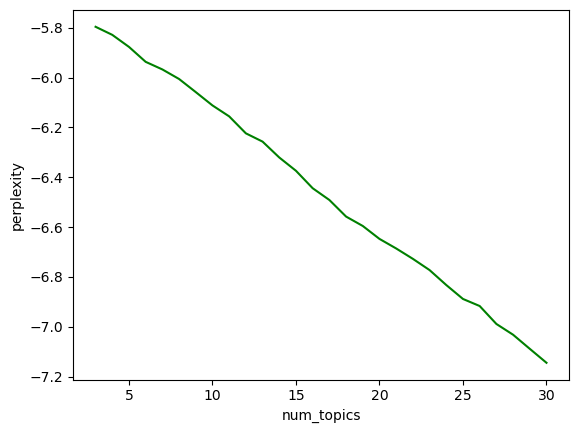

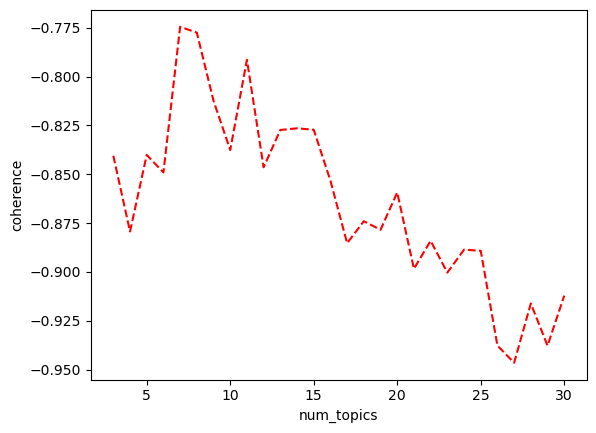

In [104]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end+1):
        model = LdaModel(corpus = corpus, id2word = dictionary, chunksize=1000, num_topics = i,random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()
# 5, 14
show_coherence(corpus, dictionary, start = 3, end = 30)